MAE: 1796.44
RMSE: 4634.68
R2 Score: 0.84


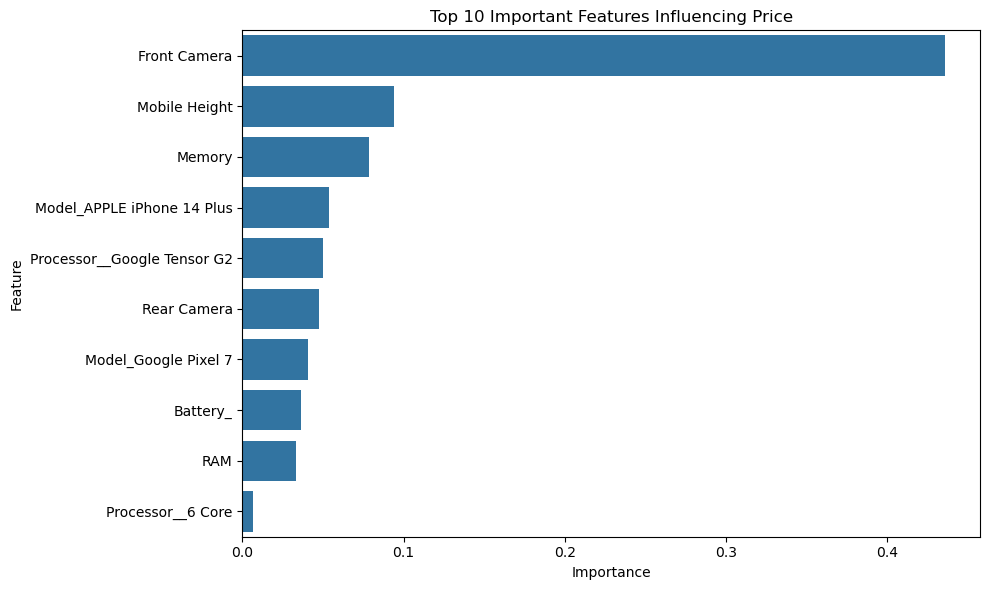

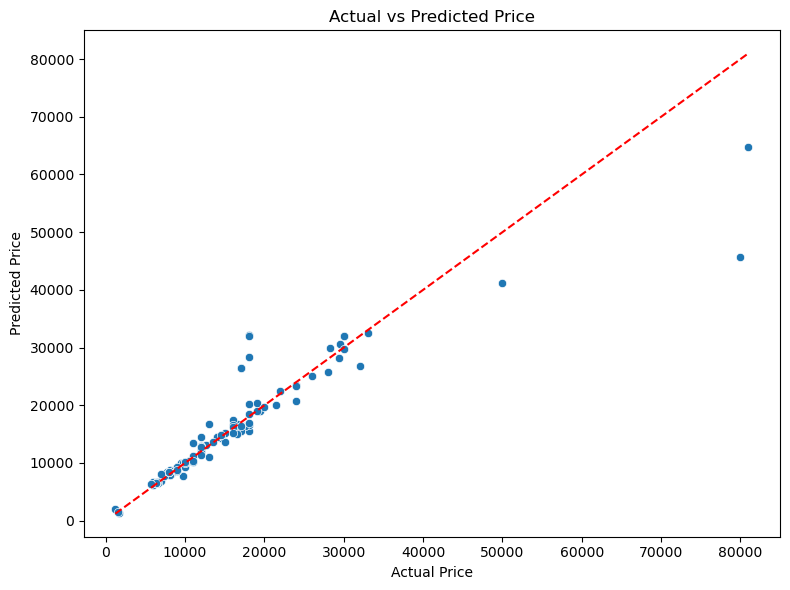


Recommendations:
1. RAM and Battery capacity significantly influence the mobile price — focus on these when pricing new models.
2. Rear and Front camera specs also play a major role — promote camera quality for premium phones.
3. Processor type adds high value — consider using better processors in mid-range models.


In [4]:
# Mobile Phone Price Prediction Project

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import re

# Step 2: Load Data
df = pd.read_csv("C:/Users/harsh/Downloads/Processed_Flipdata - Processed_Flipdata.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

# Step 3: Data Cleaning
# Convert 'Rear Camera' and 'Front Camera' to numeric
df['Rear Camera'] = df['Rear Camera'].apply(lambda x: int(re.search(r'\d+', str(x)).group()))
df['Front Camera'] = df['Front Camera'].apply(lambda x: int(re.search(r'\d+', str(x)).group()))
# Convert 'Prize' to numeric
df['Prize'] = df['Prize'].str.replace(',', '').astype(int)

# Step 4: Feature and Target Split
X = df.drop(columns=['Prize'])
y = df['Prize']

# Step 5: Categorical Encoding using Pipeline
categorical_cols = ['Model', 'Colour', 'Processor_']
numerical_cols = list(set(X.columns) - set(categorical_cols))

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Building (Random Forest)
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Step 9: Feature Importance (from Random Forest directly)
rf = model.named_steps['regressor']
encoded_features = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = list(encoded_features) + numerical_cols
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 10: Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features Influencing Price')
plt.tight_layout()
plt.show()

# Step 11: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.tight_layout()
plt.show()

# Step 12: Final Recommendations (in markdown or as printed output)
print("\nRecommendations:")
print("1. RAM and Battery capacity significantly influence the mobile price — focus on these when pricing new models.")
print("2. Rear and Front camera specs also play a major role — promote camera quality for premium phones.")
print("3. Processor type adds high value — consider using better processors in mid-range models.")


Loading the dataset...
Cleaning camera and price data...
Splitting data for training and testing...
Training the Random Forest model...
Let's see how our model performs!
Mean Absolute Error (MAE): 1796.44
Root Mean Squared Error (RMSE): 4634.68
R-squared Score: 0.84
Analyzing which features are most important...


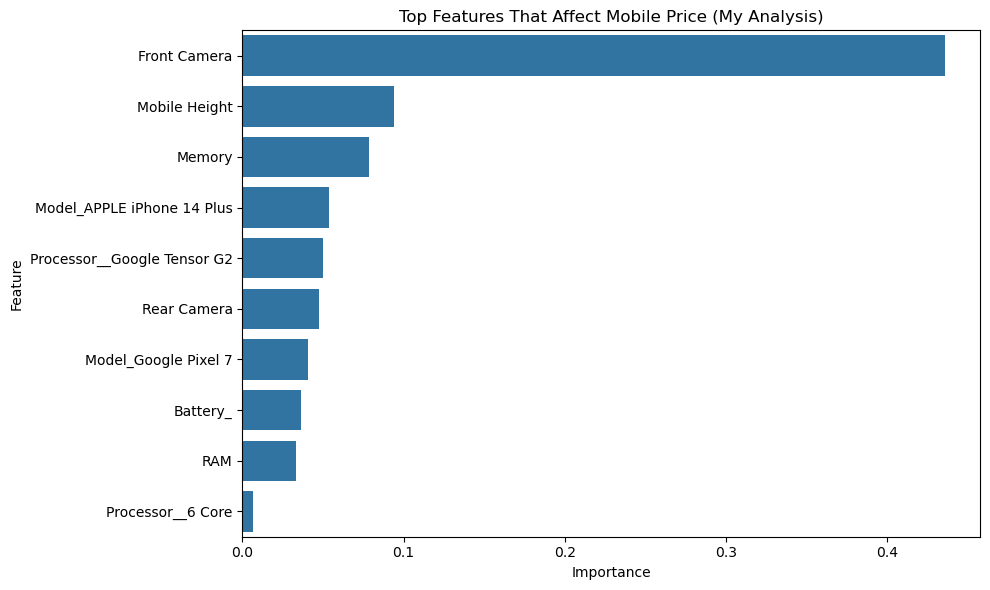

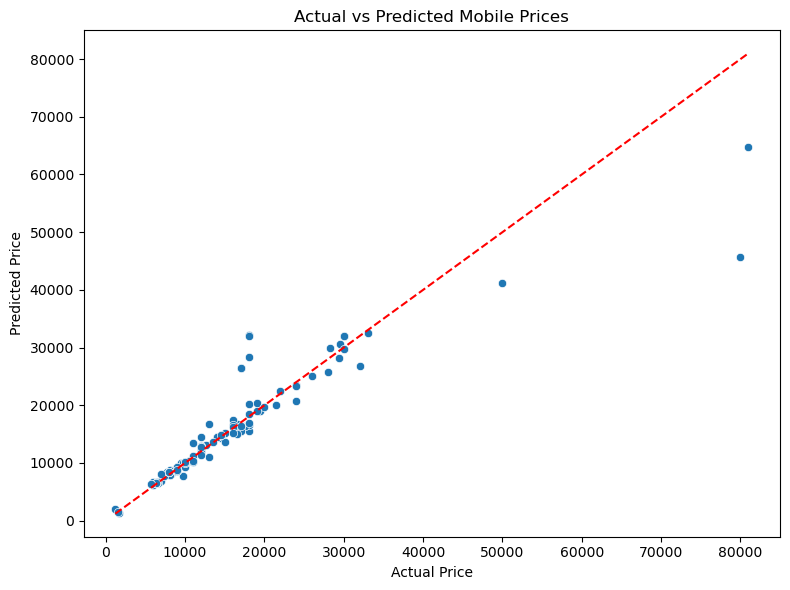


My Recommendations based on this project:
1. RAM and battery size are major factors — phones with more of these cost more.
2. Camera quality (both front and rear) also adds a lot to the price — focus on this in marketing.
3. Processor type really matters — better processors = higher prices, especially in mid-range phones.


In [6]:
# Mobile Phone Price Prediction - My Own Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import re

# Step 2: Load the dataset
print("Loading the dataset...")
df = pd.read_csv("C:/Users/harsh/Downloads/Processed_Flipdata - Processed_Flipdata.csv")

df.drop(columns=['Unnamed: 0'], inplace=True)

# Step 3: Clean the data
print("Cleaning camera and price data...")
df['Rear Camera'] = df['Rear Camera'].apply(lambda x: int(re.search(r'\d+', str(x)).group()))
df['Front Camera'] = df['Front Camera'].apply(lambda x: int(re.search(r'\d+', str(x)).group()))
df['Prize'] = df['Prize'].str.replace(',', '').astype(int)

# Step 4: Separate features and target
X = df.drop(columns=['Prize'])
y = df['Prize']

# Step 5: Encoding text columns (like model names, colors, etc.)
categorical_cols = ['Model', 'Colour', 'Processor_']
numerical_cols = list(set(X.columns) - set(categorical_cols))

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Step 6: Split data into training and test sets
print("Splitting data for training and testing...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build the model (using Random Forest)
print("Training the Random Forest model...")
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Evaluate how well it works
print("Let's see how our model performs!")
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Step 9: Check which features are most important
print("Analyzing which features are most important...")
rf = model.named_steps['regressor']
encoded_features = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = list(encoded_features) + numerical_cols
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 10: Show important features visually
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top Features That Affect Mobile Price (My Analysis)')
plt.tight_layout()
plt.show()

# Step 11: Plot predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Mobile Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.tight_layout()
plt.show()

# Step 12: My final thoughts (recommendations)
print("\nMy Recommendations based on this project:")
print("1. RAM and battery size are major factors — phones with more of these cost more.")
print("2. Camera quality (both front and rear) also adds a lot to the price — focus on this in marketing.")
print("3. Processor type really matters — better processors = higher prices, especially in mid-range phones.")